## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_complete = pd.merge(study_results, mouse_metadata,  how = "outer", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
id_count = df_complete["Mouse ID"].count()
print(id_count)
df_complete.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = len(df_complete['Mouse ID'].unique())
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_list = df_complete[df_complete.duplicated(["Mouse ID", "Timepoint"], keep = False)]
print(duplicate_list[["Mouse ID", "Timepoint"]])

    Mouse ID  Timepoint
860     g989          0
861     g989          0
862     g989          5
863     g989          5
864     g989         10
865     g989         10
866     g989         15
867     g989         15
868     g989         20
869     g989         20


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_complete.drop_duplicates(subset = ("Mouse ID", "Timepoint"), keep = "last")
df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [27]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(df_clean['Mouse ID'].unique())
new_mouse_count

249

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = df_clean.groupby("Drug Regimen")
avg_tumor = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
med_tumor = round(regimen_group["Tumor Volume (mm3)"].median(),2)
var_tumor = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std_tumor = round(regimen_group["Tumor Volume (mm3)"].std(),2)
sem_tumor = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

tumor_summary_df = pd.DataFrame({"Average" : avg_tumor, "Median" : med_tumor,
                                "Variance" : var_tumor, "Standard Deviation" : std_tumor,
                                "Standard Error" : sem_tumor})
print(tumor_summary_df)




              Average  Median  Variance  Standard Deviation  Standard Error
Drug Regimen                                                               
Capomulin       40.68   41.56     24.95                4.99            0.33
Ceftamin        52.59   51.78     39.29                6.27            0.47
Infubinol       52.88   51.82     43.13                6.57            0.49
Ketapril        55.24   53.70     68.55                8.28            0.60
Naftisol        54.33   52.51     66.17                8.13            0.60
Placebo         54.03   52.29     61.17                7.82            0.58
Propriva        52.38   50.78     43.22                6.57            0.53
Ramicane        40.22   40.67     23.49                4.85            0.32
Stelasyn        54.23   52.43     59.45                7.71            0.57
Zoniferol       53.24   51.82     48.53                6.97            0.52


## Bar and Pie Charts

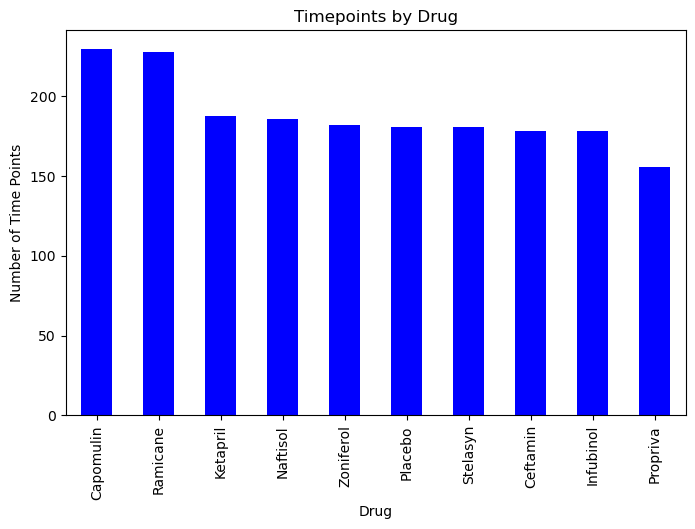

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

combined_data_regimen_group = df_clean.groupby("Drug Regimen")

bar_graph_info = combined_data_regimen_group["Timepoint"].count().sort_values(ascending = False)
bar_graph = bar_graph_info.plot(kind = "bar", color = "blue", figsize = (8,5))
bar_graph.set_title("Timepoints by Drug")
bar_graph.set_xlabel("Drug")
bar_graph.set_ylabel("Number of Time Points")
plt.show()

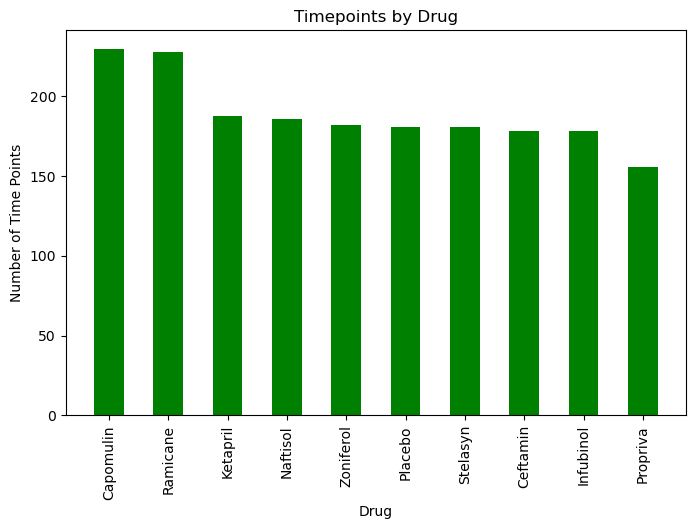

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(bar_graph_info))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (8,5))
plt.bar(x_axis, bar_graph_info, color="green", width = .5)
plt.xticks(tick_locations, bar_graph_info.index, rotation="vertical")
plt.title("Timepoints by Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Time Points")
plt.show()

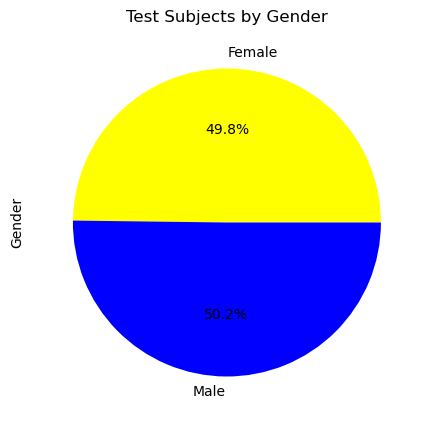

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

combined_data_gender_group = df_clean.groupby("Sex")

pie_chart_info = combined_data_gender_group["Mouse ID"].nunique()
pie_chart = pie_chart_info.plot(kind = "pie", y = pie_chart_info, colors = {"blue", "yellow"}, autopct="%1.1f%%", figsize = (5,5))
pie_chart.set_title("Test Subjects by Gender")
pie_chart.set_ylabel("Gender")
plt.show()

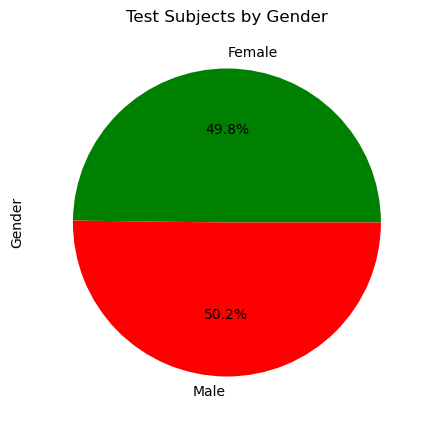

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = pie_chart_info.index
colors = ["green", "red"]
plt.figure(figsize = (5,5))
plt.pie(pie_chart_info, labels = pie_labels, colors=colors, autopct="%1.1f%%")
plt.title("Test Subjects by Gender")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:

Final_Tumor_Size = df_clean.drop_duplicates(subset = ("Mouse ID"), keep = "last")
Final_Tumor_by_drug = Final_Tumor_Size[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
Final_Tumor_Size_Capomulin = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Capomulin"]
Final_Tumor_Size_Ramicane = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Ramicane"]
Final_Tumor_Size_Infubinol = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Infubinol"]
Final_Tumor_Size_Ceftamin = Final_Tumor_by_drug.loc[Final_Tumor_by_drug["Drug Regimen"] == "Ceftamin"]

box_plot_df = pd.DataFrame({"Capomulin" : Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"],
                            "Ramicane" : Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"],
                           "Infubinol" : Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"],
                        "Ceftamin" : Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"]})
box_plot_df

,Capomulin,Ramicane,Infubinol,Ceftamin
9,38.982878,NaN,NaN,NaN
214,NaN,NaN,36.321346,NaN
224,NaN,NaN,72.226731,NaN
226,NaN,NaN,46.250112,NaN
233,NaN,NaN,57.031862,NaN
...,...,...,...,...
1857,34.455298,NaN,NaN,NaN
1867,47.685963,NaN,NaN,NaN
1877,33.329098,NaN,NaN,NaN
1882,30.485985,NaN,NaN,NaN


In [50]:
avg_tumor_size_final = round(box_plot_df.mean(),2)
quartiles = round(box_plot_df.quantile([.25,.5,.75]),2)
lower_q = quartiles.loc[.25]
upper_q = quartiles.loc[.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)
outlier_df = pd.DataFrame({"Lower Bound" : lower_bound, "Upper Bound" : upper_bound})



print(f"Tumor Size Quartiles\n\n{quartiles}\n\n")

print(f"Anything outside of these ranges is considered an outlier\n\n{outlier_df}\n\n")

Capomulin_outlier = Final_Tumor_Size_Capomulin.loc[(Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"] <= outlier_df.loc["Capomulin", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Capomulin["Tumor Volume (mm3)"] >= outlier_df.loc["Capomulin", "Upper Bound"])]
Ramicane_outlier = Final_Tumor_Size_Ramicane.loc[(Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"] <= outlier_df.loc["Ramicane", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Ramicane["Tumor Volume (mm3)"] >= outlier_df.loc["Ramicane", "Upper Bound"])]
Infubinol_outlier = Final_Tumor_Size_Infubinol.loc[(Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"] <= outlier_df.loc["Infubinol", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Infubinol["Tumor Volume (mm3)"] >= outlier_df.loc["Infubinol", "Upper Bound"])]
Ceftamin_outlier = Final_Tumor_Size_Ceftamin.loc[(Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"] <= outlier_df.loc["Ceftamin", "Lower Bound"]) |
                                                   (Final_Tumor_Size_Ceftamin["Tumor Volume (mm3)"] >= outlier_df.loc["Ceftamin", "Upper Bound"])]

outlier_list = pd.concat([Capomulin_outlier, Ramicane_outlier, Infubinol_outlier, Ceftamin_outlier])

print(f"list of all outliers\n\n{outlier_list}")
    

Tumor Size Quartiles

      Capomulin  Ramicane  Infubinol  Ceftamin
0.25      32.38     31.56      54.05     48.72
0.50      38.13     36.56      60.17     59.85
0.75      40.16     40.66      65.53     64.30


Anything outside of these ranges is considered an outlier

           Lower Bound  Upper Bound
Capomulin        20.71        51.83
Ramicane         17.91        54.31
Infubinol        36.83        82.75
Ceftamin         25.35        87.67


list of all outliers

    Mouse ID Drug Regimen  Tumor Volume (mm3)
214     c326    Infubinol           36.321346


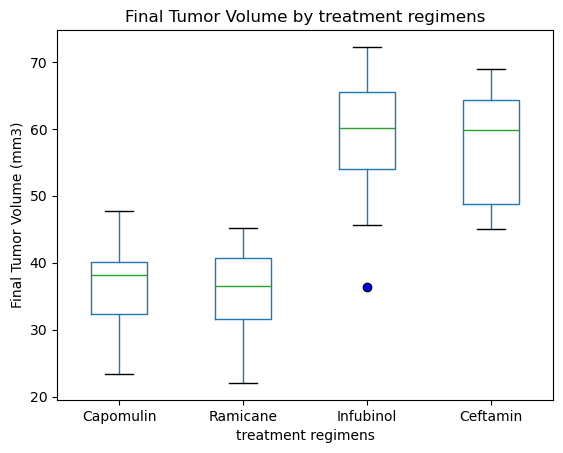

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_circle = dict(markerfacecolor = "blue", marker = "o")
fig, myboxplot = plt.subplots()
myboxplot = box_plot_df.boxplot(column = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid = False,
                                flierprops = blue_circle,)
plt.title("Final Tumor Volume by treatment regimens")
plt.xlabel("treatment regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

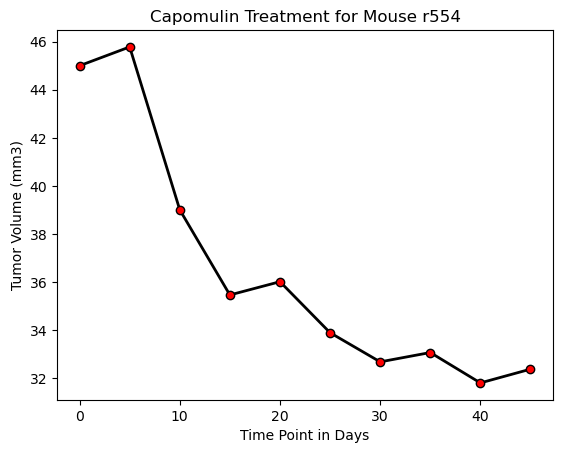

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_Tests = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"]

Potential_Mouse_List = Capomulin_Tests[["Mouse ID"]].drop_duplicates(subset = "Mouse ID", keep = "last")
IndMouse = df_clean.loc[df_clean["Mouse ID"] == "r554"]
x_timepoint = IndMouse["Timepoint"]
y_tumor_volume = IndMouse["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume, color = "black", marker = "o", markerfacecolor = "red", linewidth = 2)
plt.title(f"Capomulin Treatment for Mouse r554")
plt.xlabel("Time Point in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

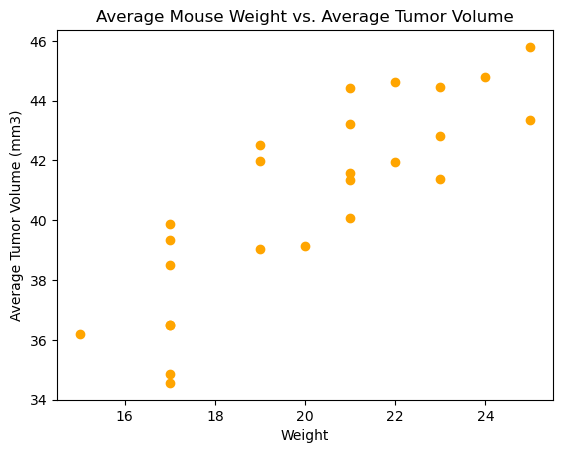

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_subjects_avgs = Capomulin_Tests.groupby("Mouse ID").mean()
avg_weight = Capomulin_subjects_avgs["Weight (g)"]
avg_tumor_volume = Capomulin_subjects_avgs["Tumor Volume (mm3)"]

plt.scatter(avg_weight, avg_tumor_volume, facecolor = "orange")
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

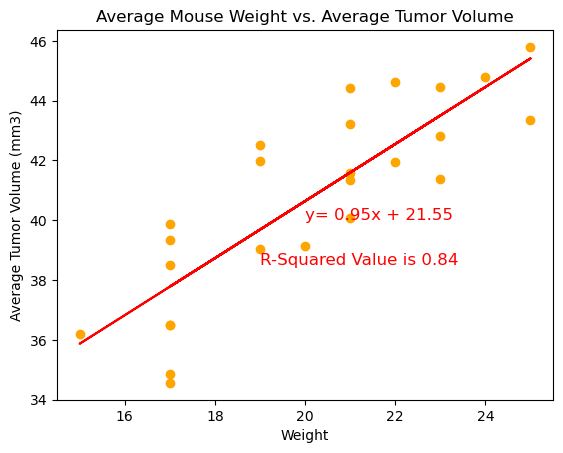

In [61]:
slope, y_int, r_value, p_value, std_err = st.linregress(avg_weight, avg_tumor_volume)

fit = avg_weight * slope  + y_int
equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))
r_square = "R-Squared Value is " + str(round(r_value,2))
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "orange")
plt.plot(avg_weight, fit, color = "red")
plt.annotate(equation, (20, 40), color = "red", fontsize = 12)
plt.annotate(r_square, (19, 38.5), color = "red", fontsize = 12)
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()